# COGS 108 - Final Project 

# Overview

My project focuses on the scoring of health inspections and what issues food establishments should focus on to improve future scores. I initially believed that focusing on minimizing critical violations would maximize any establishment's health score. Through the researched process, however, I learned that different types of establishments suffer unequally from different types of violations and should focus on different issues accordingly.

# Name & GitHub

- Name: Kyle Stenberg
- GitHub Username: klstnbrg

# Research Question

Are food establishments better off ignoring non-critical health violations in favor of minimizing critical violations?

## Background and Prior Work

In the food industry, health inspectors visit establishments at random intervals. Their job in each instance is to examine the care with which the operators of the establishment are maintaining health standards. At the end of each inspection, food establishments recieve a score, which starts at 100 and goes down accordingly to various violations broken by the establishment. There are two primary categories of violation: critical and non-critical. Critical violations are serious health risks, such as serving undercooked foods, not sanitizing hands, etc. Non-critical violations are unsanitary, but unlikely to get people sick (eg. dirty floors or not wearing hair ties/nets). While a critical violation is obviously worse than a non-critical violation, the degree of difference is up to the inspector. Because not all critical violation are equally bad and not all non-critical violations are equally bad, there is not a standard deduction for any violation.

References (include links):
- 1) https://www.washtenaw.org/1562/Violation-Types#:~:text=Critical%20violations%20are%20more%20likely,not%20the%20violation%20is%20critical.
- 2) https://www.sfdph.org/dph/EH/Food/Score/default.asp

# Hypothesis


I hypothesize that critical violations are a significantly stronger indicator of total health scores than non-critical violations (ie. a restaurant with a relatively high number of critical violations and a relatively low number of non-critical violations will have a lower total score than a restaurant with the reverse).

I theorize this because I worked in the food industry for two years in high school and my supervisors always told me to take care of critical violations immediately when health inspectors came in, even when I could have taken care of multiple non-critical violations in the same amount of time. I also expect health inspectors have more power to be lenient with non-critical violations since they are seen as less essential to fix. Being nice to the inspector despite having multiple non-critical violations might result in a higher score than being rude but actually adhearing to non-critical health standards. With critical health violations that actually endanger customers, inspectors are more honorbound to dock points, regarless of how polite you are.

# Dataset(s)

My project will be based off of the provided 'inspections' dataset, which came from the data.zip file linked on the COGS 108 canvas. I chose this particular dataset because it has columns for the critical violations, non-critical violations, and total health score of nearly 20,000 food establishment data points. These are the three main factors I need to examine for my research question.

- Dataset Name: 'inspections' or filename: 'inspections.csv' 
- Number of observations: 18,466

# Setup

In [1]:
%matplotlib inline

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning

There were far too many columns originally, so I kept only the restaurant name and facility type to describe the establishments. The main three pieces of data I needed, however, were the score, num_critical, and num_non_critical columns. The rest of my data manipulation was used as I discovered new things about the data, so I left it in the analysis section.

In [2]:
df = pd.read_csv("data/inspections.csv")
df = df[['name', 'facilitytype', 'score', 'num_critical', 'num_non_critical']].copy()
df = df.dropna()

# Data Analysis & Results

First I want to look at the correlation between critical violations and score, as well as the correlation between non_critical_violations and score.

In [3]:
column_1 = df['score']
column_2 = df['num_critical']
correlation_crit = column_1.corr(column_2)
correlation_crit

-0.6647966360056383

In [4]:
column_3 = df['num_non_critical']
correlation_non_crit = column_1.corr(column_3)
correlation_non_crit

-0.6342089153399076

Both categories appear to have similar correlations. In fact, non_critical violations have nearly the same effect on score as critical violations, which seems to depict the reverse of my initial hypthesis. However, it could be that establishments with a high number of one type of violation have a high number of the other as well. If this were the case, I would really just be finding the correlation between violations and score in both of the above boxes.

To verify, I will analyze cases in which establishments have either high critical violations OR high non_critical violations. If an establishment has high or low numbers for both of these categories, it would be difficult to identify which was the determining factor.

Now I want to decide what should be considered a "high" or "low" number of critical/non_critical violations.

In [5]:
df.quantile(.75)

score               98.0
num_critical         4.0
num_non_critical     7.0
Name: 0.75, dtype: float64

In [6]:
df.quantile(.25)

score               95.0
num_critical         1.0
num_non_critical     3.0
Name: 0.25, dtype: float64

Using >4 and <1 as the metrics to define a "high" or "low" number of critical violations, and using >7 and <3 as the metrics to define a "high" or "low" number of non_critical violations, I can extract two new datasets.

In [7]:
df_crit = df.loc[df['num_critical'] >= 4.0]
df_crit = df_crit.loc[df_crit['num_non_critical'] <= 3.0]
df_crit = df_crit.sort_values(by=['num_critical'])
df_non_crit = df.loc[df['num_critical'] <= 1.0]
df_non_crit = df_non_crit.loc[df_non_crit['num_non_critical'] >= 7.0]
df_non_crit = df_non_crit.sort_values(by=['num_non_critical'])

Now I have two dataframes, one with establishments that have a high number of critical violations and a low number of non_critical violations, and the other with establishments that have a low number of critical violations and a high number of non_critical violations. Now I can check the mean scores of these two groups to see which is lower, as well as the new correlations.

In [8]:
df_crit['score'].mean()

96.00558375634517

In [9]:
df_non_crit['score'].mean()

95.9288840262582

In [10]:
column_1b = df_crit['score']
column_2b = df_crit['num_critical']
correlation_critb = column_1b.corr(column_2b)
correlation_critb

-0.3247824417454331

In [11]:
column_1c = df_non_crit['score']
column_2c = df_non_crit['num_non_critical']
correlation_critc = column_1c.corr(column_2c)
correlation_critc

-0.2000015251949227

While the means of the scores were very similar, the new correlations tell a different story. Critical violations seem to be significantly more correlated to scores than non_critical_violations. This most likely indicates that while critical violations do have more weight than non_critical violations, non_critical violations are much more likely to vary greatly in quantity, causing the means to be the same. Some histographs could help visualize the dichotemy.

In [12]:
df_crit['num_critical'].unique(), df_non_crit['num_non_critical'].unique()

(array([ 4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 18]))

Text(0, 0.5, 'score')

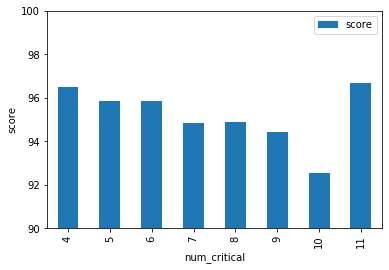

In [13]:
df_crit_plot = df_crit.groupby('num_critical').mean()
df_crit_plot.plot(y='score', kind='bar', ylim=(90, 100)).set_ylabel('score')

Text(0, 0.5, 'score')

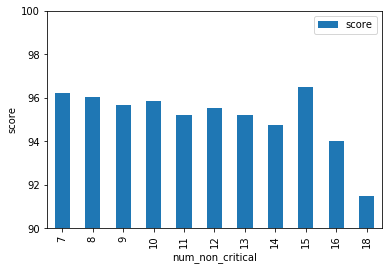

In [14]:
df_non_crit_plot = df_non_crit.groupby('num_non_critical').mean()
df_non_crit_plot.plot(y='score', kind='bar', ylim=(90, 100)).set_ylabel('score')

I have some odd outliers at the upper end of the violation counts, so I'll check their value counts

In [15]:
df_crit['num_critical'].value_counts(), df_non_crit['num_non_critical'].value_counts()

(4     458
 5     275
 6     133
 7      50
 8      39
 9      17
 10     10
 11      3
 Name: num_critical, dtype: int64, 7     357
 8     232
 9     139
 10     71
 11     54
 12     26
 13     22
 14      8
 16      3
 18      1
 15      1
 Name: num_non_critical, dtype: int64)

Since the last value on the critical heavy dataframe and the last three values on the non_critical heavy dataframe all have <=3 values, I'll remove them so as not to skew my data.

In [16]:
df_crit = df_crit[df_crit['num_critical'] != 11]
df_non_crit = df_non_crit[(df_non_crit['num_non_critical'] != 16) & (df_non_crit['num_non_critical'] != 18) & (df_non_crit['num_non_critical'] != 15)]
df_crit['num_critical'].value_counts(), df_non_crit['num_non_critical'].value_counts()

(4     458
 5     275
 6     133
 7      50
 8      39
 9      17
 10     10
 Name: num_critical, dtype: int64, 7     357
 8     232
 9     139
 10     71
 11     54
 12     26
 13     22
 14      8
 Name: num_non_critical, dtype: int64)

Now we can generate new histograms

Text(0, 0.5, 'score')

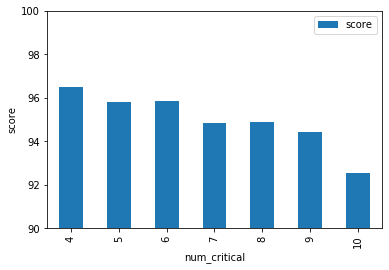

In [17]:
df_crit_plot = df_crit.groupby('num_critical').mean()
df_crit_plot.plot(y='score', kind='bar', ylim=(90, 100)).set_ylabel('score')

Text(0, 0.5, 'score')

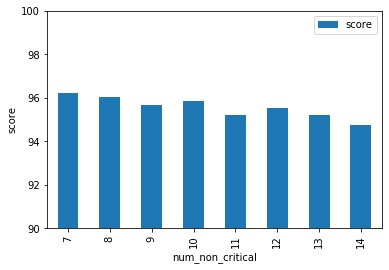

In [18]:
df_non_crit_plot = df_non_crit.groupby('num_non_critical').mean()
df_non_crit_plot.plot(y='score', kind='bar', ylim=(90, 100)).set_ylabel('score')

Now both plots have a fairly linear distribution. It's clear that the slope of the first graph is steeper, indicating that critical violations do have a greater correlation to score than non_critical violations. Also, from the value counts above, critical violation counts seem to be concentrated around the lower values, with non_critical violation counts more evenly spread across the possible values. This indicates that non_critical violations are more likely to vary.

This could mean that both critical and non_critical violations are nearly exactly as easy to fix as their weights imply (assuming variability in violation quantity reflects how easy/insignificant the violations are to fix, as well as how commonly they appear). This would also assume that establishments currently put equal effort into minimizing their critical and non_critical violations. Based on this data, restaurants should spend equal time fixing both types of issues.

Perhaps the answer could be different based on the type of establishment. One might theorize that meat vendors are more at risk of critical violations because they deal with raw meat. A public school lunch room might be more likely to face issues with non_critical violations as most of their foods are preserved/frozen. First, I'll take a look at the different types of establishments.

In [19]:
df['facilitytype'].value_counts()

Restaurant                           11985
Food Stand                            3253
Public School Lunchrooms              1587
Meat Market                            735
Institutional Food Service             359
Mobile Food Units                      213
Private School Lunchrooms              135
Pushcarts                              127
Elderly Nutrition Sites (catered)       69
Limited Food Service                     3
Name: facilitytype, dtype: int64

Limited Food Service and Eldery Nutrition Sites (catered) each have a small number of datapoints relative to the other establishments. So I'll drop them to make sure the subsequent analysis is well based.

In [20]:
df = df[df['facilitytype'] != 'Limited Food Service']
df = df[df['facilitytype'] != 'Elderly Nutrition Sites (catered)']
df['facilitytype'].value_counts()

Restaurant                    11985
Food Stand                     3253
Public School Lunchrooms       1587
Meat Market                     735
Institutional Food Service      359
Mobile Food Units               213
Private School Lunchrooms       135
Pushcarts                       127
Name: facilitytype, dtype: int64

In [21]:
df_restaurant = df[df['facilitytype'] == 'Restaurant']
df_food_stand = df[df['facilitytype'] == 'Food Stand']
df_public_school_lunchrooms = df[df['facilitytype'] == 'Public School Lunchrooms']
df_meat_market = df[df['facilitytype'] == 'Meat Market']
df_institutional_food_service = df[df['facilitytype'] == 'Institutional Food Service']
df_mobile_food_units = df[df['facilitytype'] == 'Mobile Food Units']
df_private_school_lunchrooms = df[df['facilitytype'] == 'Private School Lunchrooms']
df_pushcarts = df[df['facilitytype'] == 'Pushcarts']

In [22]:
column_1_restaurant = df_restaurant['score']
column_2_restaurant = df_restaurant['num_critical']
correlation_crit_restaurant = column_1_restaurant.corr(column_2_restaurant)
column_3_restaurant = df_restaurant['num_non_critical']
correlation_non_crit_restaurant = column_1_restaurant.corr(column_3_restaurant)
correlation_crit_restaurant, correlation_non_crit_restaurant

(-0.6465933790977835, -0.6008706644109125)

In [23]:
column_1_food_stand = df_food_stand['score']
column_2_food_stand = df_food_stand['num_critical']
correlation_crit_food_stand = column_1_food_stand.corr(column_2_food_stand)
column_3_food_stand = df_food_stand['num_non_critical']
correlation_non_crit_food_stand = column_1_food_stand.corr(column_3_food_stand)
correlation_crit_food_stand, correlation_non_crit_food_stand

(-0.6214357428696512, -0.6339944246651159)

In [24]:
column_1_public_school_lunchrooms = df_public_school_lunchrooms['score']
column_2_public_school_lunchrooms = df_public_school_lunchrooms['num_critical']
correlation_crit_public_school_lunchrooms = column_1_public_school_lunchrooms.corr(column_2_public_school_lunchrooms)
column_3_public_school_lunchrooms = df_public_school_lunchrooms['num_non_critical']
correlation_non_crit_public_school_lunchrooms = column_1_public_school_lunchrooms.corr(column_3_public_school_lunchrooms)
correlation_crit_public_school_lunchrooms, correlation_non_crit_public_school_lunchrooms

(-0.6205794684819885, -0.4129716865531336)

In [25]:
column_1_meat_market = df_meat_market['score']
column_2_meat_market = df_meat_market['num_critical']
correlation_crit_meat_market = column_1_meat_market.corr(column_2_meat_market)
column_3_meat_market = df_meat_market['num_non_critical']
correlation_non_crit_meat_market = column_1_meat_market.corr(column_3_meat_market)
correlation_crit_meat_market, correlation_non_crit_meat_market

(-0.5697415858875359, -0.6096359498613404)

In [26]:
column_1_institutional_food_service = df_institutional_food_service['score']
column_2_institutional_food_service = df_institutional_food_service['num_critical']
correlation_crit_institutional_food_service = column_1_institutional_food_service.corr(column_2_institutional_food_service)
column_3_institutional_food_service = df_institutional_food_service['num_non_critical']
correlation_non_crit_institutional_food_service = column_1_institutional_food_service.corr(column_3_institutional_food_service)
correlation_crit_institutional_food_service, correlation_non_crit_institutional_food_service

(-0.6039413915321157, -0.4634277179953133)

In [27]:
column_1_mobile_food_units = df_mobile_food_units['score']
column_2_mobile_food_units = df_mobile_food_units['num_critical']
correlation_crit_mobile_food_units = column_1_mobile_food_units.corr(column_2_mobile_food_units)
column_3_mobile_food_units = df_mobile_food_units['num_non_critical']
correlation_non_crit_mobile_food_units = column_1_mobile_food_units.corr(column_3_mobile_food_units)
correlation_crit_mobile_food_units, correlation_non_crit_mobile_food_units

(-0.6997077093269227, -0.6223768510825106)

In [28]:
column_1_private_school_lunchrooms = df_private_school_lunchrooms['score']
column_2_private_school_lunchrooms = df_private_school_lunchrooms['num_critical']
correlation_crit_private_school_lunchrooms = column_1_private_school_lunchrooms.corr(column_2_private_school_lunchrooms)
column_3_private_school_lunchrooms = df_private_school_lunchrooms['num_non_critical']
correlation_non_crit_private_school_lunchrooms = column_1_private_school_lunchrooms.corr(column_3_private_school_lunchrooms)
correlation_crit_private_school_lunchrooms, correlation_non_crit_private_school_lunchrooms

(-0.6062812713640052, -0.4901536920204388)

In [29]:
column_1_pushcarts = df_pushcarts['score']
column_2_pushcarts = df_pushcarts['num_critical']
correlation_crit_pushcarts = column_1_pushcarts.corr(column_2_pushcarts)
column_3_pushcarts = df_pushcarts['num_non_critical']
correlation_non_crit_pushcarts = column_1_pushcarts.corr(column_3_pushcarts)
correlation_crit_pushcarts, correlation_non_crit_pushcarts

(-0.447803975346634, -0.1509124687789978)

Now I have an interesting mixed bag of results. While food stands seems to have a pretty similar correlation for both critical violations to score and non_critical violations to score, the rest seems to favor one or the other. Strangely enough, meat markets suffer more from non_critical violations than critical ones, and school lunchrooms suffer more from critical violations than non_critical ones. Maybe this could attributed to an overrcorrection mentality where meat handlers take extra care to ensure the quality of their raw goods as they assume it is important the same way I did. It could also be a sad reflection of the ineptitude of school lunchrooms to be docked so much to critical violations.

Overall, it seems that inspectors seem to dock more for critical violations at restaurants, school lunchrooms, institutional food services, mobile food units, and pushcarts. However, inspectors dock harder for non_critical violations at food stands (slightly) and meat markets.

# Ethics & Privacy

This data was provided to me by the COGSCI department. There aren't any privacy concerns I need to deal with, especially as I do not intend to publish the analysis publically. This data, if it was used publically, could be used to target food inspectors. As shown in the last set of calculations, food inspectors statistically are more likely to dock certain types of food establishments harshly for any kind of violation. For instance, on average, any restaurant violation will subtract more points than any pushcart violation. I did make certain assumptions about the data based on its size as well. I assumed there weren't a select few inspectors that appeared a high enough number of times on the set so as to skew data towards their personal biases. With nearly 20,000 data points, this seemed unrealistic. It is also possible that certain racial/ethnic/socioeconomic groups are more likely to operate certain types of food establishments and the subconscious bias of all health inspectors against different categories of people caused the data to be skewed. I also separated data based on the type category denoted by the dataset. It is quite possible that the difference between pushcarts and mobile food units are less than that of very different restaurants (eg. a Starbucks compared to a Hibachi Grilling Restaurant). The categorizing of different types of food establishments makes sense, but it isn't necessarily optimized, and the data might have been presented very differently if I had separated the dataframes based on types of food served, size of the establishment, or some other category. My data was also limited to North Carolina, so if I wanted to generalize the information on a national level, I would need to include data from other states. If I were to do further research, I would want to divide datasets based on food ethnicity rather than type of establishment, since I think it might be skewing my data to a greater degree. I would also like to examine other states, specifically California, as it is the most relevant to me. 

# Conclusion & Discussion

From my research, I came across a few findings. Firstly, the impacts of critical and non_critical violations seem to be pretty evenly weighted based on ther frequencies. Non_critical violations, compared to critical_violations, appear to affect total health scores inversely to the frequency with which they appear/disappear. This is, however, a generalized finding. When taking into account what the food establishment type at hand is, the analysis changes. 

Food stands and meat markets actually suffer more from each non_critical violation than from each critical violation. And while other establishments still suffer more from each critical violation, certain establishment types suffer almost equally from each of them, such as restaurants and mobile food units. Since non_critical violations are, presumabley, easier to fix and appear in higher numbers, these establishments might be better off focusing on minimizing non_critical violations.

Of the remaining establishments, school lunchrooms, institutional food services, and pushcarts, critical violations were significantly more impactful than non_critical violations. These types of food establishments should probably focus on minimizing their critical violations.